#  Import Libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Loading the Data

In [143]:
df = pd.read_excel("C:/Users/14379/Desktop/portfolio/bank customer data.xlsx")
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

# Data Cleaning

In [144]:
# Check for missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

print("No Missing or duplicate values found in this data")


No Missing or duplicate values found in this data


# Data Preprocessing

In [147]:
# Convert necessary columns to the correct data types.
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')

# Drop or fill missing values 
df = df.dropna() 

In [148]:
# Filtering out the data of the customers whose Balance > 10000

In [149]:
filtered_data = data[data['Balance'] > 10000]
print(filtered_data[['CustomerId', 'Surname']])

      CustomerId                  Surname
1       15647311                     Hill
2       15619304                     Onio
4       15737888                 Mitchell
5       15574012                      Chu
7       15656148                   Obinna
8       15792365                       He
9       15592389                       H?
10      15767821                   Bearce
15      15643966                  Goforth
16      15737452                    Romeo
26      15736816                    Young
28      15728693               McWilliams
29      15656300                 Lucciano
31      15706552            Odinakachukwu
32      15750181                Sanderson
35      15794171                 Lombardo
36      15788448                   Watson
37      15729599                  Lorenzo
39      15585768                  Cameron
41      15738148                   Clarke
42      15687946                  Osborne
43      15755196                   Lavine
44      15684171                  

In [150]:
# Filtering out the data of Male customers only 

In [151]:
pd.set_option('display.max_rows',None)
filtered_data = data[data['Gender'] == 'Male']
print(filtered_data)

      RowNumber  CustomerId            Surname  CreditScore Geography Gender  \
5             6    15574012                Chu          645     Spain   Male   
6             7    15592531           Bartlett          822    France   Male   
8             9    15792365                 He          501    France   Male   
9            10    15592389                 H?          684    France   Male   
10           11    15767821             Bearce          528    France   Male   
11           12    15737173            Andrews          497     Spain   Male   
15           16    15643966            Goforth          616   Germany   Male   
16           17    15737452              Romeo          653   Germany   Male   
18           19    15661507            Muldrow          587     Spain   Male   
20           21    15577657           McDonald          732    France   Male   
23           24    15725737             Mosman          669    France   Male   
25           26    15738191            M

In [152]:
# Checking whether the customer has a credit card and a satisfaction score > 3 

In [153]:
filtered_data = data[data['HasCrCard'].isin([1,0]) & (data['Satisfaction Score'] > 3)][['RowNumber','CustomerId','Surname']] 
print(filtered_data) 

      RowNumber  CustomerId                  Surname
3             4    15701354                     Boni
4             5    15737888                 Mitchell
5             6    15574012                      Chu
15           16    15643966                  Goforth
19           20    15568982                      Hao
26           27    15736816                    Young
27           28    15700772                  Nebechi
28           29    15728693               McWilliams
31           32    15706552            Odinakachukwu
34           35    15732963                 Clements
36           37    15788448                   Watson
39           40    15585768                  Cameron
40           41    15619360                    Hsiao
41           42    15738148                   Clarke
50           51    15616550               Chidiebele
55           56    15760861                Phillipps
58           59    15623944                    T'ien
59           60    15804771                Vel

# Summary Statistics

In [154]:
df.describe() 
df['Geography'].value_counts()  


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

# Visualizing Data

### Histograms for numerical variables

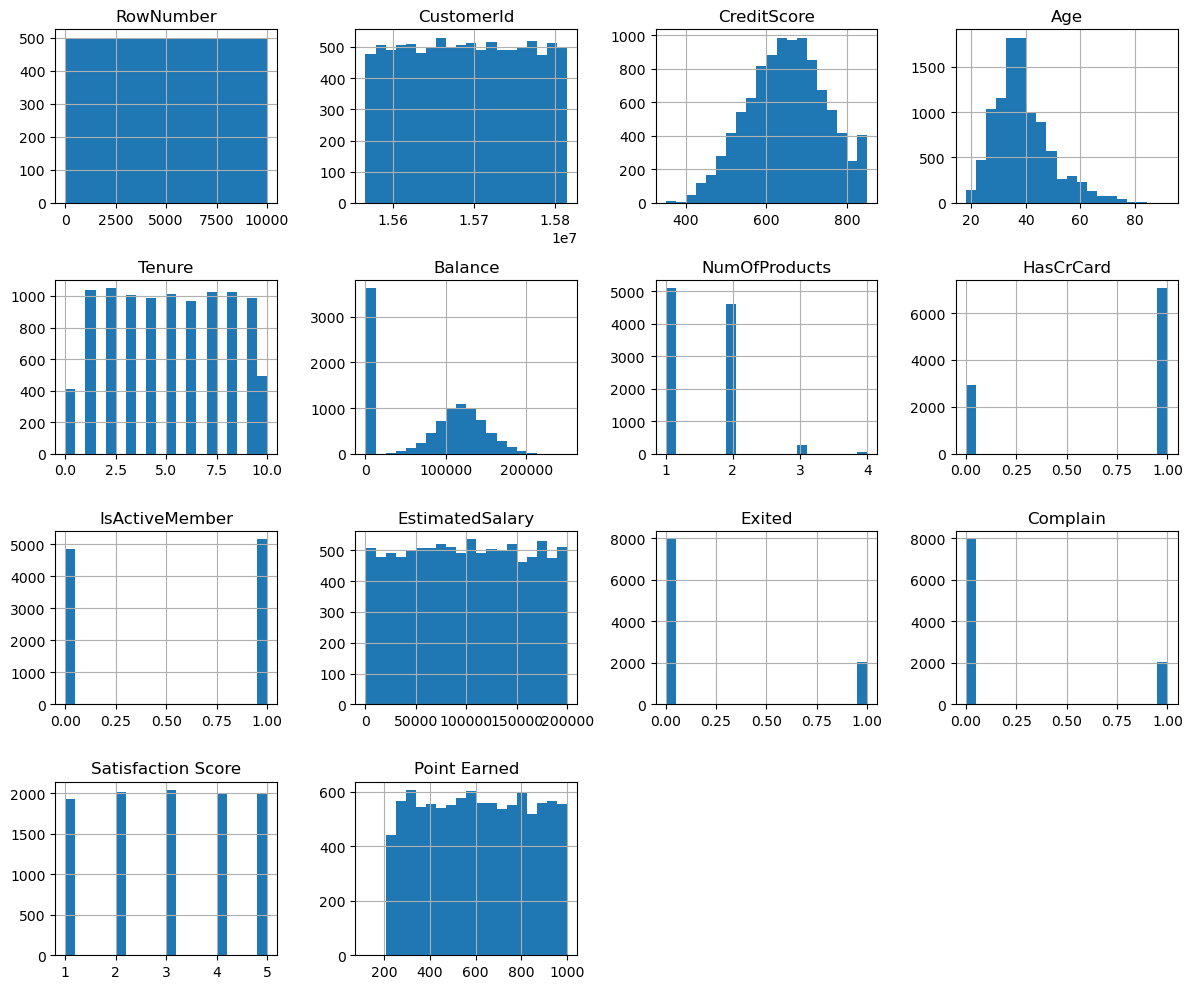

In [155]:
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()


###  Box plots for outliers detection


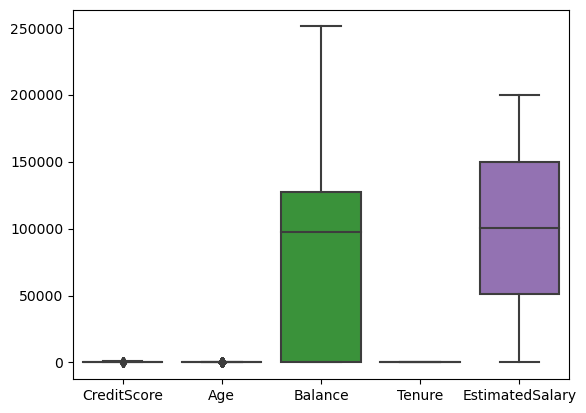

In [156]:
sns.boxplot(data=df[['CreditScore', 'Age', 'Balance', 'Tenure', 'EstimatedSalary']])
plt.show()

### Correlation heatmap

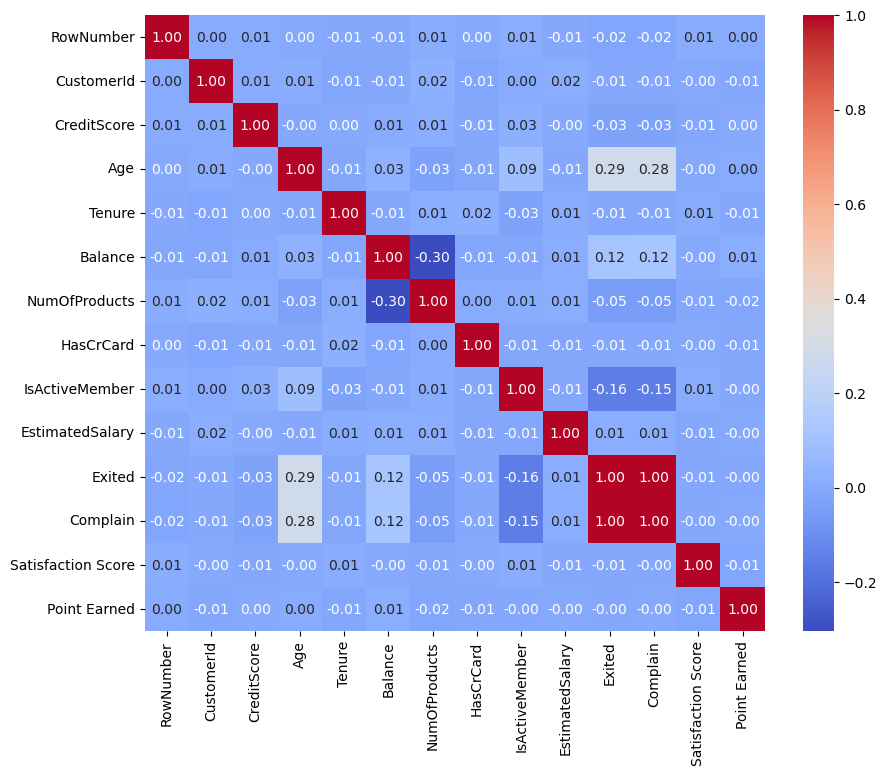

In [157]:
# Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


###  Churn rate visualization

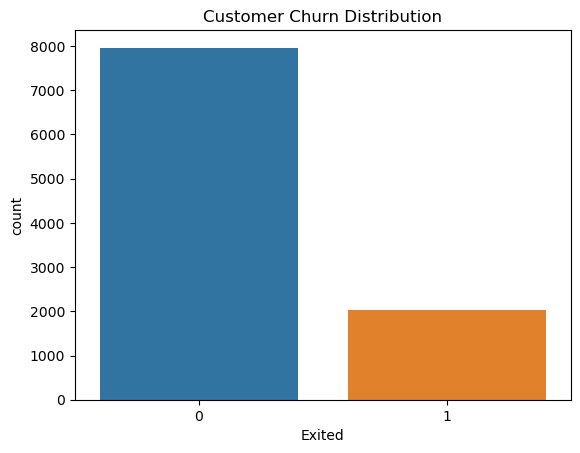

In [158]:
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.show()

### Churn vs. Geography and Gender

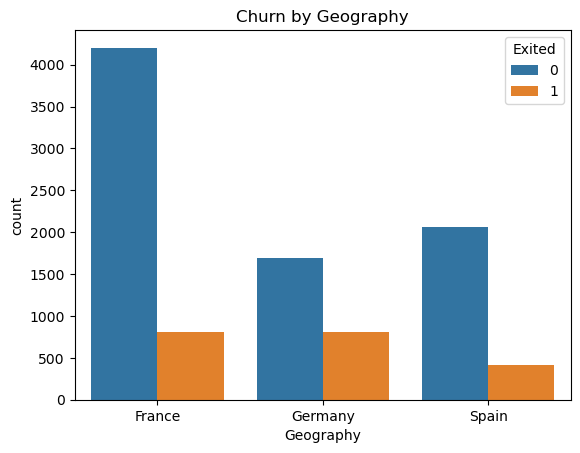

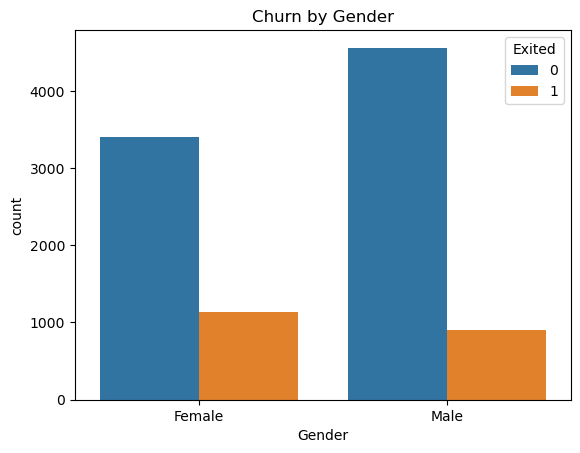

In [159]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

# Feature Engineering

In [160]:
# Encoding categorical variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Feature scaling
scaler = StandardScaler()
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])


# Training, Validation, and Testing

In [164]:
# Attempt to drop the columns only if they exist
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
print("Columns to drop:", existing_columns_to_drop)

# Drop only the existing columns
df = df.drop(columns=existing_columns_to_drop, axis=1)


Columns to drop: []


In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inspect and preprocess the data
print("Current columns in the dataset:", df.columns)

# Define features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Define a column transformer to apply scaling to numerical columns and one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Create a pipeline with the preprocessor and the Random Forest Classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on validation set
y_valid_pred = model.predict(X_valid)
print("Validation Set Performance:")
print(classification_report(y_valid, y_valid_pred))

# Evaluate the model on test set
y_test_pred = model.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Current columns in the dataset: Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')
Validation Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00       306

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Test Set Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       1.00      1.00      1.00       305

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1

# Model Evaluation

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class

###  1. Confusion Matrix

Confusion Matrix:
[[1194    1]
 [   1  304]]


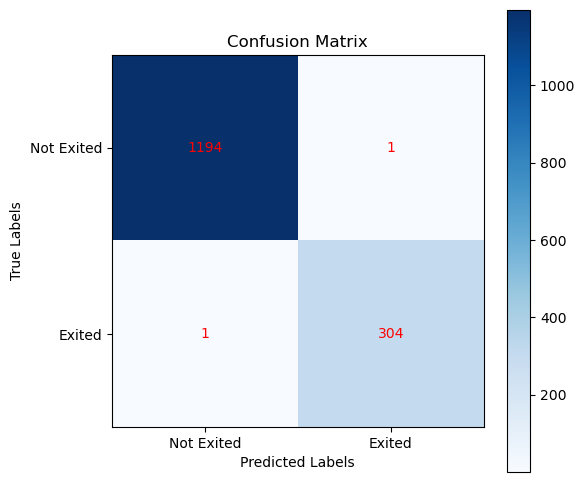

In [168]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.yticks([0, 1], ['Not Exited', 'Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
plt.show()

### 2. Classification Report

In [171]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1195
           1       1.00      1.00      1.00       305

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



### 3. Accuracy, Precision, Recall, and F1-Score

In [172]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Model Performance Metrics:
Accuracy: 0.9987
Precision: 0.9967
Recall: 0.9967
F1-Score: 0.9967


###  4. ROC Curve

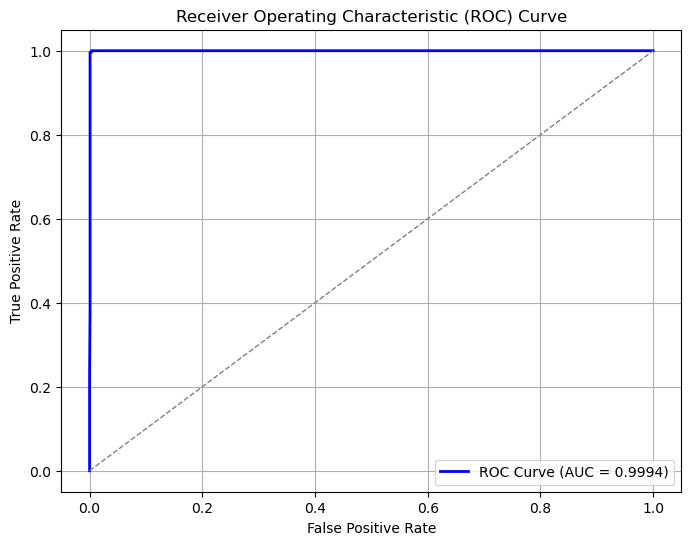

In [173]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 5. Precision-Recall Curve

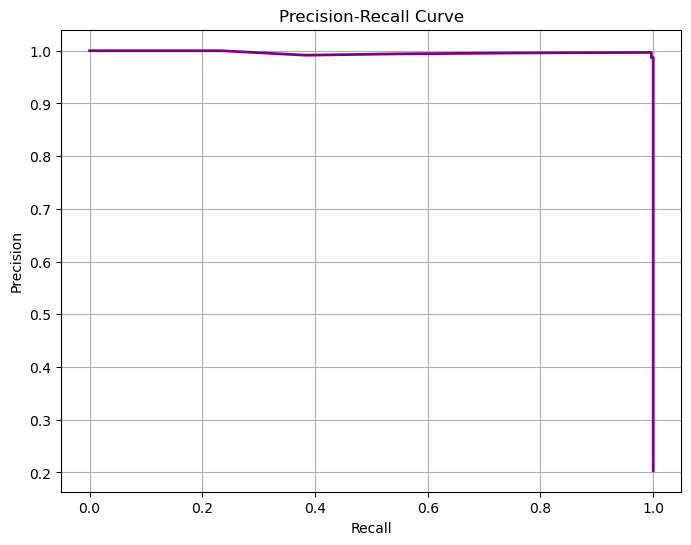

In [175]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='purple', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

### Summary

In [176]:
print("\nSummary of Model Evaluation:")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Summary of Model Evaluation:
Confusion Matrix:
[[1194    1]
 [   1  304]]
Accuracy: 0.9987
Precision: 0.9967
Recall: 0.9967
F1-Score: 0.9967
AUC: 0.9994
